In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
table00 = pd.read_json("data/merged-01-00", lines=True)
small = pd.read_json("data/merged-01-00-snippet", lines=True)

In [ ]:
# extras
table01 = pd.read_json("data/merged-01-01", lines=True)
table14 = pd.read_json("data/merged-02-14", lines=True)
table20 = pd.read_json("data/merged-03-20", lines=True)

In [4]:
pd.set_option('display.max_columns', 72)
table00.head(20)

,_host,ad_network_id,ad_type,adlog_count,advertiser_id,bid_requests,bid_responses,c_cnt,c_flag_cnt,c_timestamp,c_txn_fee,c_txn_rate,campaign_id,campaign_type,ck,cr_cnt,creative_id,exp_mode,f_cnt,flag,geo_area_code,geo_city_code,geo_city_name,geo_continent_code,geo_country_code2,geo_country_code3,geo_dma_code,geo_postal_code,geo_region_name,geo_timezone,i_cnt,i_flag_cnt,i_timestamp,i_txn_fee,i_txn_rate,ip_address,is_bot,is_fraud,keywords,num_ads,preview,pub_campaign_id,pub_network_id,r_cnt,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,r_timestamp,rate_metric,referer,session_id,site_id,token,txn_fee,txn_rate,ua,ua_device,ua_device_type,ua_major,ua_minor,ua_name,ua_os,ua_os_name,url,user_agent,uuid,vi_cnt,vi_flag_cnt,vi_timestamp,vv_cnt,widget_id,zone_id
0,an-prod-ralphie-frontline-bulks.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,NaN,NaN,20523,private,"{""widget_type"": [""text_feed""]}",1,1454941,NaN,0.0,NaN,203.0,5282901.0,Brookfield,NA,US,USA,501.0,06804,CT,America/New_York,1.0,0.0,2018-04-01T00:56:55.982000Z,NaN,NaN,68.116.200.34,NaN,False,,10.0,NaN,NaN,767,1,10,10,0,2018-04-01T00:56:55.194040Z,CPC,http%3A%2F%2Fwww.breitbart.com%2Fbig-journalis...,706a0d7116b840a194c81b49edbc0a29_f7ec539c,13042,6XKC5K21,NaN,NaN,Mozilla/5.0 (iPad; CPU OS 10_3_3 like Mac OS X...,iPad,TAB,10.0,0.0,Mobile Safari,iOS 10.3,iOS,http://media.breitbart.com/media/if/newsmax.html,Mozilla/5.0 (iPad; CPU OS 10_3_3 like Mac OS X...,60039c05-5285-49ca-b4eb-a435e9d8352b,0.0,0.0,NaN,0.0,NaN,26024
1,an-prod-ralphie-frontline-bedim.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,NaN,NaN,20523,private,"{""widget_type"": [""text_feed""]}",1,1454941,NaN,0.0,NaN,205.0,4083697.0,Pinson,NA,US,USA,630.0,35126,AL,America/Chicago,1.0,0.0,2018-04-01T00:45:42.182000Z,NaN,NaN,174.223.128.183,NaN,False,,10.0,NaN,NaN,767,1,10,10,0,2018-04-01T00:45:41.834098Z,CPC,http%3A%2F%2Fwww.breitbart.com%2Fjerusalem%2F,8cc504de1a9f4424b21a4165261910cc_5123bfda,13042,6XKC5K21,NaN,NaN,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,iPad,TAB,11.0,0.0,Mobile Safari,iOS 11.2,iOS,http://media.breitbart.com/media/if/newsmax.html,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,504e4902-4a71-4155-9de8-32e4afc00013,0.0,0.0,NaN,0.0,NaN,26024
2,an-prod-ralphie-frontline-bedim.us-east-1,767,[story],1,4735,[],[],0.0,0.0,NaN,NaN,NaN,21827,outside,"{""widget_type"": [""text_feed""]}",1,1810968,NaN,0.0,NaN,901.0,4641239.0,Memphis,NA,US,USA,640.0,38117,TN,America/Chicago,1.0,0.0,2018-04-01T00:38:48.245000Z,0.0,0.0,75.65.54.41,NaN,False,,10.0,NaN,NaN,767,1,10,10,0,2018-04-01T00:38:42.196667Z,CPM,https%3A%2F%2Fwww.google.com%2F,0a84e86680984a909b077f5b0d90c2b4_7071cfdc,13182,0AIIPHOX,0.0,0.0,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,iPad,TAB,11.0,2.0,Mobile Safari,iOS 11.2,iOS,http://thehill.com/policy/national-security/38...,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,c182f217-aff0-4f43-b74c-8c19344efbbf,1.0,0.0,2018-04-01T00:39:06.102000Z,0.0,NaN,18310
3,an-prod-ralphie-frontline-goofs.us-east-1,727,[story],1,4909,[],[],NaN,NaN,NaN,NaN,NaN,26801,outside,,1,5639350,0.0,NaN,NaN,510.0,5355933.0,Hayward,NA,US,USA,807.0,94541,CA,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,172.58.38.241,NaN,False,"Pocket_SaveTopic_Month_finance,Pocket_SaveTopi...",NaN,NaN,NaN,727,1,1,1,0,2018-04-01T00:29:13.267027Z,CPM,,709d2c3baf6147fdba39a75a09cd1761_0611b821,10481,MPA9WFG3,NaN,NaN,Mozilla/5.0 (Linux; Android 8.0.0; Pixel 2 Bui...,Pixel 2,MOB,62.0,0.0,Chrome Mobile,Android 8.0,Android,http://getpocket.com,NaN,429TaA7bgeWM3pk04ed1783dc1p4g4e349bc6flc28o91b...,NaN,NaN,NaN,NaN,NaN,14414
4,an-prod-ralphie-frontline-soths.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,NaN,NaN,20523,private,"{""widget_type"": [""text_feed""]}",1,1454941,NaN,0.0,NaN,701.0,5690532.0,Minot,NA,US,USA,687.0,58703,ND,America/Chicago,1.0,0.0,2018-04-01T00:11:24.602000Z,NaN,NaN,74.207.139.114,NaN,False,,10.0,NaN,NaN,767,1,10,10,0,2018-04-01T00:11:19.706421Z,CPC,http%3A%2F%2Fwww.breitbart.com%2F,b2d8ee6efb3445b191f895dfe0

In [40]:
# Testing for any bid_responses at all
# Somehow there are none in these 4 random samples
# Going to drop the columns for now bc apparently they are useless
print(len(table00[[rq != [] for rq in table00['bid_responses']]]), end=" ")
print(len(table01[[rq != [] for rq in table01['bid_responses']]]), end=" ")
print(len(table14[[rq != [] for rq in table14['bid_responses']]]), end=" ")
print(len(table20[[rq != [] for rq in table20['bid_responses']]]), end=" ")

0 0 0 0 

In [16]:
# splitting table up between the ads and the people clicking the ads
ads = small[small['keywords'] == '']
clickers = small[small['keywords'] != '']

In [7]:
for col in small.columns:
    print(col + ":", end=" ")
    try:
        print(len(set(small[col])))
    except TypeError as e:
        print(e)

_host: 19
ad_network_id: 18
ad_type: unhashable type: 'list'
adlog_count: 1
advertiser_id: 24
bid_requests: unhashable type: 'list'
bid_responses: unhashable type: 'list'
c_cnt: 217
c_flag_cnt: 217
c_timestamp: 2
campaign_id: 34
campaign_type: 2
ck: 3
cr_cnt: 1
creative_id: 61
exp_mode: 827
f_cnt: 216
flag: 992
geo_area_code: 367
geo_city_code: 683
geo_city_name: 629
geo_continent_code: 6
geo_country_code2: 39
geo_country_code3: 39
geo_dma_code: 294
geo_postal_code: 819
geo_region_name: 100
geo_timezone: 55
i_cnt: 217
i_flag_cnt: 217
i_timestamp: 786
i_txn_fee: 794
i_txn_rate: 796
ip_address: 958
is_bot: 965
is_fraud: 2
keywords: 105
num_ads: 184
pub_campaign_id: 1000
pub_network_id: 4
r_cnt: 2
r_num_ads_requested: 7
r_num_ads_returned: 9
r_num_ads_third_party: 1
r_timestamp: 1000
rate_metric: 2
referer: 243
session_id: 1000
site_id: 20
token: 61
txn_fee: 794
txn_rate: 796
ua: 367
ua_device: 140
ua_device_type: 5
ua_major: 45
ua_minor: 15
ua_name: 22
ua_os: 39
ua_os_name: 13
url: 240
u

### Graphs of what keywords were present for user rows from several different tables

KEYWORDS = ['Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_programming']


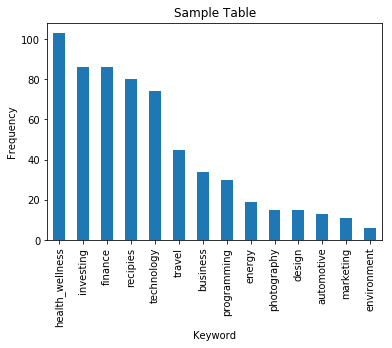

KEYWORDS = ['Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_human_resources', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_programming', 'Pocket_SaveTopic_Month_insurance']


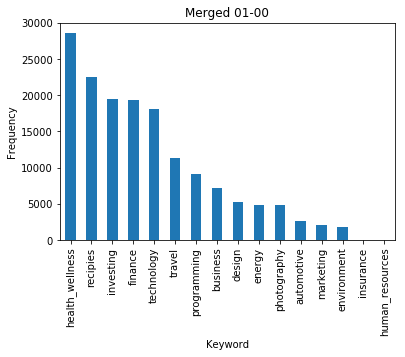

KEYWORDS = ['Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_insurance', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_human_resources', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_programming']


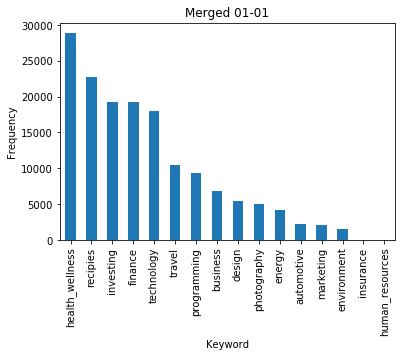

KEYWORDS = ['Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_insurance', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_UserAge_Month_GreaterThan_1', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_human_resources', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_programming']


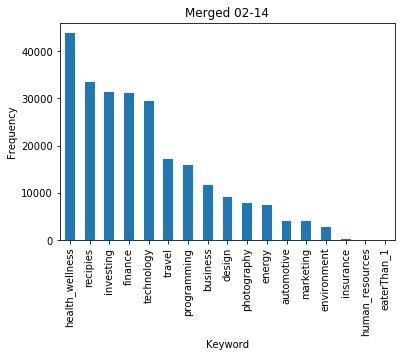

KEYWORDS = ['Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_insurance', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_human_resources', 'taboola_via_adsnative-dynamic', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_programming']


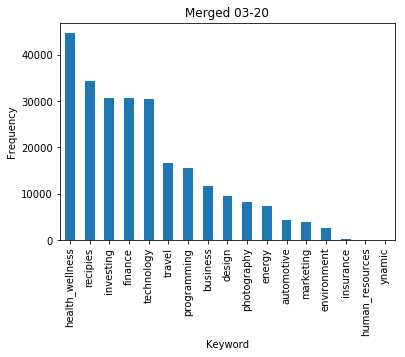

In [79]:
from collections import defaultdict

def graph_keywords(table, title):
    nonemptykeywords = table[table['keywords'] != ''] # this pulls out all of the user rows
    keywords = nonemptykeywords['keywords'] # pulls out only keywords column
    
    # We manually aggregate values because every cell value contains a string with potentially multiple keywords
    keyword_count = defaultdict(lambda: 0, {})
    for elem in keywords:
        words = elem.split(',')
        for word in words:
            keyword_count[word] += 1

    PREFIX = "Pocket_SaveTopic_Month_"

#     KEYWORDS = [k[len(PREFIX):] for k in keyword_count.keys()]
    KEYWORDS = list(keyword_count.keys())
    print("KEYWORDS =", KEYWORDS)

    count_map = {key[len(PREFIX):]: value for key, value in keyword_count.items()}
    s = pd.Series(count_map).sort_values(ascending=False)
    graph = s.plot(kind="bar", title=title)
    graph.set_xlabel("Keyword")
    graph.set_ylabel("Frequency")
    plt.show()



graph_keywords(small, "Sample Table")
graph_keywords(table00, "Merged 01-00")
graph_keywords(table01, "Merged 01-01")
graph_keywords(table14, "Merged 02-14")
graph_keywords(table20, "Merged 03-20")

### Histogram of times during the day when ads were displayed

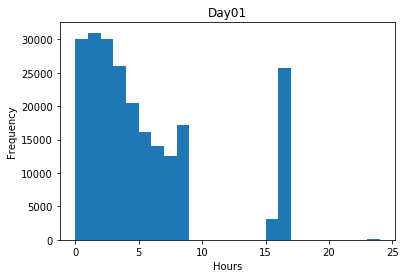

In [188]:
import parse
def graph_time(table, title):
    # Replace values in timestamp columns
    # We are using r_timestamp which is when an ad is requested
    # An alternative is i_timestamp which is when the impression is made,
    # but there are many more NaNs because only the winning ad is displayed/impression is made
    FORMAT = "{0}T{1}:{2}:{3}Z"
    copy = table["r_timestamp"].copy()
    assert len(copy.shape) == 1, "Incorrect copy dimensions"
    for i in range(copy.size):
        t = copy.iloc[i]
        date, h, m, s = parse.parse(FORMAT, t)
        # NOTE we assume everything is in one day
        h, m, s = float(h), float(m), float(s)
        inseconds = h*60*60 + m*60 + s
        inhours = inseconds / 3600
#         if inseconds > 3600:
#             print(t)
        copy.iloc[i] = inhours
    timeplot = copy.plot(kind="hist", bins=24, title=title)
    timeplot.set_xlabel("Hours")
    
# To save us a lot of time from converting the entire file to a DataFrame
def extract_times(filename):
    f = open(filename, 'r')
    FINDSTR = '"r_timestamp": '
    TIMESTAMP_FORMAT = '"YYYY-MM-DDTHH:MM:SS.SSSSSSZ"'
    count = 0
    rows_list = []
    for line in f:
        index = line.find(FINDSTR)
        if index == -1:
            print("Did not find timestamp at index", count)
        else:
            timestamp = line[index+len(FINDSTR)+1:index+len(FINDSTR)+len(TIMESTAMP_FORMAT)-1]
        rows_list.append({"r_timestamp": timestamp})
        count += 1
    return pd.DataFrame(rows_list)
    
# TODO uncomment following line when kernel is restarted; avoiding rerunning for now
########## df = extract_times("data/merged-01-xx") ##########
graph_time(df.sample(frac=0.1), "Day01")

### Number of Ads Displayed

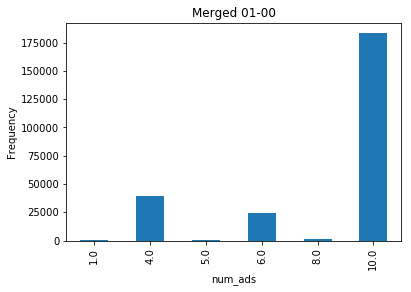

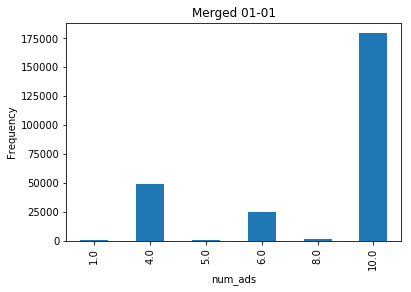

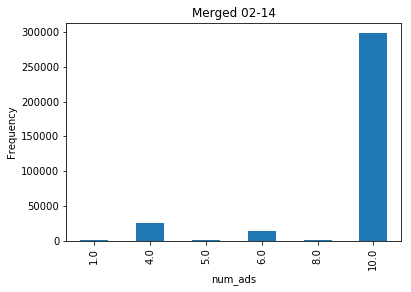

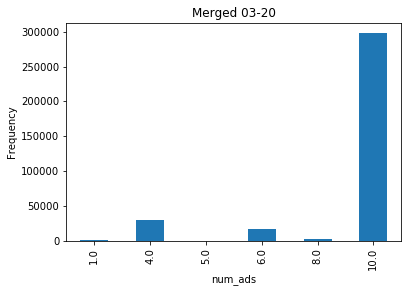

In [219]:
def graph_numads(table, title):
    numads = table[["num_ads"]].dropna()
    grouped = numads.groupby("num_ads").size()
    graph = grouped.plot.bar()
    graph.set_ylabel("Frequency")
    graph.set_title(title)
    plt.show()

graph_numads(table00, "Merged 01-00")
graph_numads(table01, "Merged 01-01")
graph_numads(table14, "Merged 02-14")
graph_numads(table20, "Merged 03-20")

### IGNORE BELOW

In [42]:
small.columns

Index(['_host', 'ad_network_id', 'ad_type', 'adlog_count', 'advertiser_id',
       'bid_requests', 'bid_responses', 'c_cnt', 'c_flag_cnt', 'c_timestamp',
       'campaign_id', 'campaign_type', 'ck', 'cr_cnt', 'creative_id',
       'exp_mode', 'f_cnt', 'flag', 'geo_area_code', 'geo_city_code',
       'geo_city_name', 'geo_continent_code', 'geo_country_code2',
       'geo_country_code3', 'geo_dma_code', 'geo_postal_code',
       'geo_region_name', 'geo_timezone', 'i_cnt', 'i_flag_cnt', 'i_timestamp',
       'i_txn_fee', 'i_txn_rate', 'ip_address', 'is_bot', 'is_fraud',
       'keywords', 'num_ads', 'pub_campaign_id', 'pub_network_id', 'r_cnt',
       'r_num_ads_requested', 'r_num_ads_returned', 'r_num_ads_third_party',
       'r_timestamp', 'rate_metric', 'referer', 'session_id', 'site_id',
       'token', 'txn_fee', 'txn_rate', 'ua', 'ua_device', 'ua_device_type',
       'ua_major', 'ua_minor', 'ua_name', 'ua_os', 'ua_os_name', 'url',
       'user_agent', 'uuid', 'vi_cnt', 'vi_flag_cnt'

In [ ]:
# EDIT THIS as needed
# NOTE somehow (in 01-00, 01-01, 02-14, 03-20 at least) there was not a single filled bid_request column
useless_all = []
# only one value
useless_all.extend(['adlog_count', 'cr_cnt', 'r_num_ads_third_party'])
# no values
useless_all.extend(['bid_requests', 'bid_responses'])

useless_ads = []
useless_clicks = []
filtered = small.drop(useless)